In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
#import time
#now = time.strftime('%d%m%Y%H%M%S')
from datetime import datetime

In [2]:
# get https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html#a1 csv
ca_numtotal = pd.read_csv('covid19.csv', usecols=['prname', 'date', 'numtotal', 'numtoday'])
ca_num = ca_numtotal[ca_numtotal['prname']=='Canada']
ca_num = ca_num.reset_index(level=0, drop=True)
ca_num['date'] = pd.to_datetime(ca_num['date'], format='%d/%m/%Y')
ca_num = ca_num[-26:]

In [3]:
ca_num['Daily'] = ca_num['numtotal'].diff().fillna(0).astype(int)
ca_num['DailyDiff'] = ca_num['Daily'].diff().fillna(0).astype(int)
ca_num['Daily_pct_chg'] = round(ca_num['Daily'].pct_change(fill_method='ffill')*100, 1)
ca_num['Total_pct_chg'] = round(ca_num['numtotal'].pct_change(fill_method='ffill')*100, 1)
ca_today = ca_num[-21:].reset_index(level=0, drop=True)

In [4]:
type(ca_today['date'])

pandas.core.series.Series

In [5]:
ca_today_ave = round(ca_today['DailyDiff'].sum() / len(ca_today),1)
ca_today_7day_ave = round(ca_today['DailyDiff'][-7:].sum() / len(ca_today[-7:]),1)
ca_today_5day_ave = round(ca_today['DailyDiff'][-5:].sum() / len(ca_today[-5:]),1)
ca_today_7day_std = round(ca_today['DailyDiff'][-7:].std(),1)
str(ca_today_5day_ave)

'-19.0'

In [6]:
ca_today.columns

Index(['prname', 'date', 'numtotal', 'numtoday', 'Daily', 'DailyDiff',
       'Daily_pct_chg', 'Total_pct_chg'],
      dtype='object')

In [7]:
ca_tdy_cnts = ca_today[['date', 'DailyDiff']]

In [8]:
ca_cnts = ca_tdy_cnts['DailyDiff'].values
ca_dts = ca_tdy_cnts['date'].values



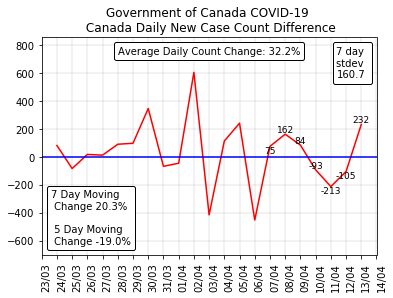

In [9]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.

#xfmt = mdates.DateFormatter('%d/%m/%y')
xfmt = mdates.DateFormatter('%d/%m')
ax.xaxis.set_major_formatter(xfmt)

locator = MaxNLocator(nbins=24) # with 14 bins you will have 13 ticks
ax.xaxis.set_major_locator(locator)

plt.xticks(rotation=90, va='top', ha='left', fontsize=10)
ax.grid(color='grey', linestyle='-', linewidth=0.2)
ax.plot(ca_today['date'], ca_today['DailyDiff'], color='red')  # Plot some data on the axes.



ax.annotate(str(ca_cnts[-1]),xy=(ca_dts[-1],ca_cnts[-1]), horizontalalignment='center', verticalalignment='bottom', fontsize=9)
ax.annotate(str(ca_cnts[-2]),xy=(ca_dts[-2],ca_cnts[-2]), horizontalalignment='center', verticalalignment='top', fontsize=9)
ax.annotate(str(ca_cnts[-3]),xy=(ca_dts[-3],ca_cnts[-3]), horizontalalignment='center', verticalalignment='top', fontsize=9)
ax.annotate(str(ca_cnts[-4]),xy=(ca_dts[-4],ca_cnts[-4]), horizontalalignment='center', verticalalignment='bottom', fontsize=9)
ax.annotate(str(ca_cnts[-5]),xy=(ca_dts[-5],ca_cnts[-5]), horizontalalignment='center', verticalalignment='bottom', fontsize=9)
ax.annotate(str(ca_cnts[-6]),xy=(ca_dts[-6],ca_cnts[-6]), horizontalalignment='center', verticalalignment='bottom', fontsize=9)
ax.annotate(str(ca_cnts[-7]),xy=(ca_dts[-7],ca_cnts[-7]), horizontalalignment='center', verticalalignment='top', fontsize=9)

from matplotlib.offsetbox import AnchoredText
at = AnchoredText('Average Daily Count Change: ' + str(ca_today_ave)+'%',
                  prop=dict(size=10), frameon=True,
                  loc='upper center',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

at = AnchoredText('7 day \nstdev \n' + str(ca_today_7day_std),
                  prop=dict(size=10), frameon=True,
                  loc='upper right',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

at = AnchoredText('7 Day Moving\n Change ' + str(ca_today_7day_ave) +'%\n\n 5 Day Moving\n Change ' + str(ca_today_5day_ave) +'%',
                  prop=dict(size=10), frameon=True,
                  loc='lower left',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

plt.axhline(y=0, color='blue', linestyle='-')
plt.ylim(min(ca_today['DailyDiff']-250), max(ca_today['DailyDiff']+250))
plt.title('Government of Canada COVID-19 \n Canada Daily New Case Count Difference')
plt.savefig('GOC_Canada_covid-19_CaseCountDiff.png')
plt.show()

In [10]:
ca_cnts[-7:]

array([  75,  162,   84,  -93, -213, -105,  232])

In [11]:
ca_today.columns

Index(['prname', 'date', 'numtotal', 'numtoday', 'Daily', 'DailyDiff',
       'Daily_pct_chg', 'Total_pct_chg'],
      dtype='object')

In [12]:
ca_tdy_perc = ca_today[['date', 'Daily_pct_chg']]

In [13]:
ca_percs = ca_tdy_perc['Daily_pct_chg'].values
ca_dts_percs = ca_tdy_perc['date'].values
type(ca_dts)

numpy.ndarray

In [14]:
ca_perc_ave = round(ca_today['Daily_pct_chg'].sum() / len(ca_today),1)
ca_perc_7day_ave = round(ca_today['Daily_pct_chg'][-7:].sum() / len(ca_today[-7:]),1)
ca_perc_5day_ave = round(ca_today['Daily_pct_chg'][-5:].sum() / len(ca_today[-5:]),1)
ca_perc_7day_std = round(ca_today['Daily_pct_chg'][-7:].std(),1)
str(ca_perc_5day_ave)

'-0.6'

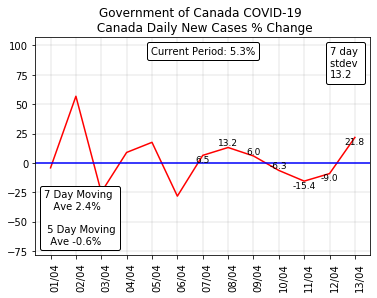

In [15]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.

#xfmt = mdates.DateFormatter('%d/%m/%y')
xfmt = mdates.DateFormatter('%d/%m')
ax.xaxis.set_major_formatter(xfmt)

locator = MaxNLocator(nbins=16) # with 14 bins you will have 13 ticks
ax.xaxis.set_major_locator(locator)

plt.xticks(rotation=90, va='top', ha='left', fontsize=10)
ax.grid(color='grey', linestyle='-', linewidth=0.2)
ax.plot(ca_today['date'][-13:], ca_today['Daily_pct_chg'][-13:], color='red')  # Plot some data on the axes.

ax.annotate(str(ca_percs[-1]),xy=(ca_dts_percs[-1],ca_percs[-1]), horizontalalignment='center', verticalalignment='top', fontsize=9)
ax.annotate(str(ca_percs[-2]),xy=(ca_dts_percs[-2],ca_percs[-2]), horizontalalignment='center', verticalalignment='top', fontsize=9)
ax.annotate(str(ca_percs[-3]),xy=(ca_dts_percs[-3],ca_percs[-3]), horizontalalignment='center', verticalalignment='top', fontsize=9)
ax.annotate(str(ca_percs[-4]),xy=(ca_dts_percs[-4],ca_percs[-4]), horizontalalignment='center', verticalalignment='bottom', fontsize=9)
ax.annotate(str(ca_percs[-5]),xy=(ca_dts_percs[-5],ca_percs[-5]), horizontalalignment='center', verticalalignment='bottom', fontsize=9)
ax.annotate(str(ca_percs[-6]),xy=(ca_dts_percs[-6],ca_percs[-6]), horizontalalignment='center', verticalalignment='bottom', fontsize=9)
ax.annotate(str(ca_percs[-7]),xy=(ca_dts_percs[-7],ca_percs[-7]), horizontalalignment='center', verticalalignment='top', fontsize=9)

from matplotlib.offsetbox import AnchoredText
at = AnchoredText('Current Period: ' + str(ca_perc_ave)+'%',
                  prop=dict(size=10), frameon=True,
                  loc='upper center',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

at = AnchoredText('7 day \nstdev \n' + str(ca_perc_7day_std),
                  prop=dict(size=10), frameon=True,
                  loc='upper right',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

at = AnchoredText('7 Day Moving\n   Ave ' + str(ca_perc_7day_ave) +'%\n\n 5 Day Moving\n  Ave ' + str(ca_perc_5day_ave) +'%',
                  prop=dict(size=10), frameon=True,
                  loc='lower left',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

plt.axhline(y=0, color='blue', linestyle='-')
plt.ylim(min(ca_today['Daily_pct_chg'][-13:]-50), max(ca_today['Daily_pct_chg'][-13:]+50))
plt.title('Government of Canada COVID-19 \n Canada Daily New Cases % Change')
plt.savefig('GOC_Canada_covid-19_PerChg.png')
plt.show()

In [16]:
ca_mavg = ca_numtotal[ca_numtotal['prname']=='Canada']
ca_mavg = ca_mavg.reset_index(level=0, drop=True)
ca_mavg['date'] = pd.to_datetime(ca_mavg['date'], format='%d/%m/%Y')
ca_mavg.head()

,prname,date,numtotal,numtoday
0,Canada,2020-01-31,4,4.0
1,Canada,2020-02-08,7,3.0
2,Canada,2020-02-16,8,1.0
3,Canada,2020-02-21,9,1.0
4,Canada,2020-02-24,10,1.0


In [17]:
ca_mavg['sma_5day'] = ca_mavg.iloc[:,3].rolling(window=5).mean()
ca_mavg['sma_7day'] = ca_mavg.iloc[:,3].rolling(window=7).mean()

In [18]:
ca_mavg = ca_mavg[-15:]
ca_mavg = ca_mavg.reset_index(level=0, drop=True)
ca_mavg

,prname,date,numtotal,numtoday,sma_5day,sma_7day
0,Canada,2020-03-30,7437,1179.0,805.6,763.714286
1,Canada,2020-03-31,8548,1111.0,901.0,822.285714
2,Canada,2020-04-01,9613,1065.0,984.8,886.285714
3,Canada,2020-04-02,11283,1670.0,1171.6,1034.285714
4,Canada,2020-04-03,12537,1254.0,1255.8,1121.142857
5,Canada,2020-04-04,13904,1367.0,1293.4,1211.285714
6,Canada,2020-04-05,15512,1608.0,1392.8,1322.000000
7,Canada,2020-04-06,16667,1155.0,1410.8,1318.571429
8,Canada,2020-04-07,17897,1230.0,1322.8,1335.571429
9,Canada,2020-04-08,19289,1392.0,1350.4,1382.285714


In [19]:
ca_mavg.to_csv('ca_mavg.csv')

In [20]:
dates_mav = ca_mavg['date'].values
mavg_5day = ca_mavg['sma_5day'].values
mavg_7day = ca_mavg['sma_7day'].values
mavg_5day = mavg_5day.astype(int)
mavg_7day = mavg_7day.astype(int)

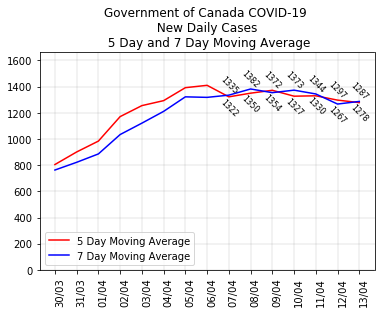

In [21]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.

#xfmt = mdates.DateFormatter('%d/%m/%y')
xfmt = mdates.DateFormatter('%d/%m')
ax.xaxis.set_major_formatter(xfmt)

locator = MaxNLocator(nbins=16) # with 14 bins you will have 13 ticks
ax.xaxis.set_major_locator(locator)

plt.xticks(rotation=90, va='top', ha='left', fontsize=10)
ax.grid(color='grey', linestyle='-', linewidth=0.2)
ax.plot(dates_mav, mavg_5day, color='red', label='5 Day Moving Average')  # Plot some data on the axes.
ax.plot(dates_mav, mavg_7day, color='blue', label='7 Day Moving Average')  # Plot some data on the axes.

ax.annotate(str(mavg_5day[-1]),xy=(dates_mav[-1],mavg_5day[-1]), horizontalalignment='center', verticalalignment='top', rotation=-45, fontsize=8)
ax.annotate(str(mavg_5day[-2]),xy=(dates_mav[-2],mavg_5day[-2]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=8)
ax.annotate(str(mavg_5day[-3]),xy=(dates_mav[-3],mavg_5day[-3]), horizontalalignment='center', verticalalignment='top', rotation=-45, fontsize=8)
ax.annotate(str(mavg_5day[-4]),xy=(dates_mav[-4],mavg_5day[-4]), horizontalalignment='center', verticalalignment='top', rotation=-45, fontsize=8)
ax.annotate(str(mavg_5day[-5]),xy=(dates_mav[-5],mavg_5day[-5]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=8)
ax.annotate(str(mavg_5day[-6]),xy=(dates_mav[-6],mavg_5day[-6]), horizontalalignment='center', verticalalignment='top', rotation=-45, fontsize=8)
ax.annotate(str(mavg_5day[-7]),xy=(dates_mav[-7],mavg_5day[-7]), horizontalalignment='center', verticalalignment='top', rotation=-45, fontsize=8)

ax.annotate(str(mavg_7day[-1]),xy=(dates_mav[-1],mavg_7day[-1]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=8)
ax.annotate(str(mavg_7day[-2]),xy=(dates_mav[-2],mavg_7day[-2]), horizontalalignment='center', verticalalignment='top', rotation=-45, fontsize=8)
ax.annotate(str(mavg_7day[-3]),xy=(dates_mav[-3],mavg_7day[-3]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=8)
ax.annotate(str(mavg_7day[-4]),xy=(dates_mav[-4],mavg_7day[-4]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=8)
ax.annotate(str(mavg_7day[-5]),xy=(dates_mav[-5],mavg_7day[-5]), horizontalalignment='center', verticalalignment='top', rotation=-45, fontsize=8)
ax.annotate(str(mavg_7day[-6]),xy=(dates_mav[-6],mavg_7day[-6]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=8)
ax.annotate(str(mavg_7day[-7]),xy=(dates_mav[-7],mavg_7day[-7]), horizontalalignment='center', verticalalignment='bottom', rotation=-45, fontsize=8)



"""
from matplotlib.offsetbox import AnchoredText
at = AnchoredText('Mar.25 to Current: Average \nDaily % Change: ' + str(ca_perc_ave)+'%',
                  prop=dict(size=10), frameon=True,
                  loc='upper center',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

at = AnchoredText('7 day \nstdev \n' + str(ca_perc_7day_std),
                  prop=dict(size=10), frameon=True,
                  loc='upper right',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

at = AnchoredText('7 Day Moving\n   Ave ' + str(ca_perc_7day_ave) +'%\n\n 5 Day Moving\n  Ave ' + str(ca_perc_5day_ave) +'%',
                  prop=dict(size=10), frameon=True,
                  loc='upper left',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

plt.axhline(y=0, color='blue', linestyle='-')
plt.ylim(min(ca_today['Daily_pct_chg'][-13:]-50), max(ca_today['Daily_pct_chg'][-13:]+50))
"""
plt.title('Government of Canada COVID-19 \n New Daily Cases \n 5 Day and 7 Day Moving Average')
plt.savefig('GOC_Canada_covid-19_MovingAverage.png')

plt.legend(loc='best')

plt.ylim(0, ca_mavg['sma_5day'].max()+250)
plt.show()

In [22]:
print(mavg_5day[-7:])
print(mavg_7day[-7:])

[1322 1350 1372 1327 1330 1297 1278]
[1335 1382 1354 1373 1344 1267 1287]


In [23]:
#ca_mavg['sma_5day'] = ca_mavg.iloc[:,3].rolling(window=5).mean()
#ca_mavg['sma_7day'] = ca_mavg.iloc[:,3].rolling(window=7).mean()
ca_mavg_perc = ca_num[['prname','date', 'Daily_pct_chg' ]]
ca_mavg_perc = ca_mavg_perc.reset_index(level=0, drop=True)
ca_mavg_perc

,prname,date,Daily_pct_chg
0,Canada,2020-03-19,NaN
1,Canada,2020-03-20,inf
2,Canada,2020-03-21,180.2
3,Canada,2020-03-22,-72.8
4,Canada,2020-03-23,520.0
5,Canada,2020-03-24,13.1
6,Canada,2020-03-25,-12.0
7,Canada,2020-03-26,2.8
8,Canada,2020-03-27,1.9
9,Canada,2020-03-28,13.9


In [24]:
ca_mavg_perc['sma_3daily'] = ca_mavg_perc.iloc[:,2].rolling(window=3).mean()
ca_mavg_perc['sma_5daily'] = ca_mavg_perc.iloc[:,2].rolling(window=5).mean()
ca_mavg_perc['sma_7daily'] = ca_mavg_perc.iloc[:,2].rolling(window=7).mean()
ca_mavg_perc = ca_mavg_perc.reset_index(level=0, drop=True)
ca_mavg_perc

,prname,date,Daily_pct_chg,sma_3daily,sma_5daily,sma_7daily
0,Canada,2020-03-19,NaN,NaN,NaN,NaN
1,Canada,2020-03-20,inf,NaN,NaN,NaN
2,Canada,2020-03-21,180.2,NaN,NaN,NaN
3,Canada,2020-03-22,-72.8,NaN,NaN,NaN
4,Canada,2020-03-23,520.0,209.133333,NaN,NaN
5,Canada,2020-03-24,13.1,153.433333,NaN,NaN
6,Canada,2020-03-25,-12.0,173.700000,125.70,NaN
7,Canada,2020-03-26,2.8,1.300000,90.22,NaN
8,Canada,2020-03-27,1.9,-2.433333,105.16,90.457143
9,Canada,2020-03-28,13.9,6.200000,3.94,66.700000


In [25]:
ca_mavg_perc = ca_mavg_perc[15:]
ca_mavg_perc = ca_mavg_perc.reset_index(level=0, drop=True)
ca_mavg_perc

,prname,date,Daily_pct_chg,sma_3daily,sma_5daily,sma_7daily
0,Canada,2020-04-03,-24.9,9.266667,12.70,12.942857
1,Canada,2020-04-04,9.0,13.633333,6.20,12.242857
2,Canada,2020-04-05,17.6,0.566667,10.88,12.871429
3,Canada,2020-04-06,-28.2,-0.533333,6.06,2.914286
4,Canada,2020-04-07,6.5,-1.366667,-4.00,4.671429
5,Canada,2020-04-08,13.2,-2.833333,3.62,7.142857
6,Canada,2020-04-09,6.0,8.566667,3.02,-0.114286
7,Canada,2020-04-10,-6.3,4.300000,-1.76,2.542857
8,Canada,2020-04-11,-15.4,-5.233333,0.80,-0.942857
9,Canada,2020-04-12,-9.0,-10.233333,-2.30,-4.742857


In [26]:
dates_mav_perc = ca_mavg_perc['date'].values
mavg_3day_perc = ca_mavg_perc['sma_3daily'].values
mavg_5day_perc = ca_mavg_perc['sma_5daily'].values
mavg_7day_perc = ca_mavg_perc['sma_7daily'].values
#mavg_5day_perc = mavg_5day_perc.astype(int)
#mavg_7day_perc = mavg_7day_perc.astype(int)
mavg_3day_perc = np.round(mavg_3day_perc, 1)
mavg_5day_perc = np.round(mavg_5day_perc, 1)
mavg_7day_perc = np.round(mavg_7day_perc, 1)

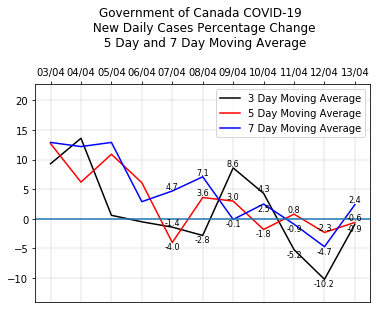

In [27]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.

#xfmt = mdates.DateFormatter('%d/%m/%y')
xfmt = mdates.DateFormatter('%d/%m')
ax.xaxis.set_major_formatter(xfmt)

locator = MaxNLocator(nbins=12) # with 14 bins you will have 13 ticks
ax.xaxis.set_major_locator(locator)

plt.xticks(rotation=90, va='bottom', ha='left', fontsize=10)
ax.grid(color='grey', linestyle='-', linewidth=0.2)
ax.plot(dates_mav_perc, mavg_3day_perc, color='black', label='3 Day Moving Average')  # Plot some data on the axes.
ax.plot(dates_mav_perc, mavg_5day_perc, color='red', label='5 Day Moving Average')  # Plot some data on the axes.
ax.plot(dates_mav_perc, mavg_7day_perc, color='blue', label='7 Day Moving Average')  # Plot some data on the axes.

ax.annotate(str(mavg_3day_perc[-1]),xy=(dates_mav_perc[-1],mavg_3day_perc[-1]), horizontalalignment='center', verticalalignment='top', fontsize=8)
ax.annotate(str(mavg_3day_perc[-2]),xy=(dates_mav_perc[-2],mavg_3day_perc[-2]), horizontalalignment='center', verticalalignment='top', fontsize=8)
ax.annotate(str(mavg_3day_perc[-3]),xy=(dates_mav_perc[-3],mavg_3day_perc[-3]), horizontalalignment='center', verticalalignment='top', fontsize=8)
ax.annotate(str(mavg_3day_perc[-4]),xy=(dates_mav_perc[-4],mavg_3day_perc[-4]), horizontalalignment='center', verticalalignment='bottom', fontsize=8)
ax.annotate(str(mavg_3day_perc[-5]),xy=(dates_mav_perc[-5],mavg_3day_perc[-5]), horizontalalignment='center', verticalalignment='bottom', fontsize=8)
ax.annotate(str(mavg_3day_perc[-6]),xy=(dates_mav_perc[-6],mavg_3day_perc[-6]), horizontalalignment='center', verticalalignment='top', fontsize=8)
ax.annotate(str(mavg_3day_perc[-7]),xy=(dates_mav_perc[-7],mavg_3day_perc[-7]), horizontalalignment='center', verticalalignment='bottom', fontsize=8)

ax.annotate(str(mavg_5day_perc[-1]),xy=(dates_mav_perc[-1],mavg_5day_perc[-1]), horizontalalignment='center', verticalalignment='bottom', fontsize=8)
ax.annotate(str(mavg_5day_perc[-2]),xy=(dates_mav_perc[-2],mavg_5day_perc[-2]), horizontalalignment='center', verticalalignment='bottom', fontsize=8)
ax.annotate(str(mavg_5day_perc[-3]),xy=(dates_mav_perc[-3],mavg_5day_perc[-3]), horizontalalignment='center', verticalalignment='bottom', fontsize=8)
ax.annotate(str(mavg_5day_perc[-4]),xy=(dates_mav_perc[-4],mavg_5day_perc[-4]), horizontalalignment='center', verticalalignment='top', fontsize=8)
ax.annotate(str(mavg_5day_perc[-5]),xy=(dates_mav_perc[-5],mavg_5day_perc[-5]), horizontalalignment='center', verticalalignment='bottom', fontsize=8)
ax.annotate(str(mavg_5day_perc[-6]),xy=(dates_mav_perc[-6],mavg_5day_perc[-6]), horizontalalignment='center', verticalalignment='bottom', fontsize=8)
ax.annotate(str(mavg_5day_perc[-7]),xy=(dates_mav_perc[-7],mavg_5day_perc[-7]), horizontalalignment='center', verticalalignment='top', fontsize=8)

ax.annotate(str(mavg_7day_perc[-1]),xy=(dates_mav[-1],mavg_7day_perc[-1]), horizontalalignment='center', verticalalignment='bottom', fontsize=8)
ax.annotate(str(mavg_7day_perc[-2]),xy=(dates_mav[-2],mavg_7day_perc[-2]), horizontalalignment='center', verticalalignment='top', fontsize=8)
ax.annotate(str(mavg_7day_perc[-3]),xy=(dates_mav[-3],mavg_7day_perc[-3]), horizontalalignment='center', verticalalignment='top', fontsize=8)
ax.annotate(str(mavg_7day_perc[-4]),xy=(dates_mav[-4],mavg_7day_perc[-4]), horizontalalignment='center', verticalalignment='top', fontsize=8)
ax.annotate(str(mavg_7day_perc[-5]),xy=(dates_mav[-5],mavg_7day_perc[-5]), horizontalalignment='center', verticalalignment='top', fontsize=8)
ax.annotate(str(mavg_7day_perc[-6]),xy=(dates_mav[-6],mavg_7day_perc[-6]), horizontalalignment='center', verticalalignment='bottom', fontsize=8)
ax.annotate(str(mavg_7day_perc[-7]),xy=(dates_mav[-7],mavg_7day_perc[-7]), horizontalalignment='center', verticalalignment='bottom', fontsize=8)



"""
from matplotlib.offsetbox import AnchoredText
at = AnchoredText('Mar.25 to Current: Average \nDaily % Change: ' + str(ca_perc_ave)+'%',
                  prop=dict(size=10), frameon=True,
                  loc='upper center',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

at = AnchoredText('7 day \nstdev \n' + str(ca_perc_7day_std),
                  prop=dict(size=10), frameon=True,
                  loc='upper right',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

at = AnchoredText('7 Day Moving\n   Ave ' + str(ca_perc_7day_ave) +'%\n\n 5 Day Moving\n  Ave ' + str(ca_perc_5day_ave) +'%',
                  prop=dict(size=10), frameon=True,
                  loc='upper left',
                  )
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

plt.axhline(y=0, color='blue', linestyle='-')
plt.ylim(min(ca_today['Daily_pct_chg'][-13:]-50), max(ca_today['Daily_pct_chg'][-13:]+50))
"""
plt.title('Government of Canada COVID-19 \n New Daily Cases Percentage Change\n 5 Day and 7 Day Moving Average\n')
plt.savefig('GOC_Canada_covid-19_MovingAvePct.png')

plt.legend(loc='upper right')
plt.axhline(y=0)
ax.xaxis.tick_top()
plt.ylim(ca_mavg_perc['sma_5daily'].min()-10, ca_mavg_perc['sma_5daily'].max()+10)
plt.show()

In [28]:
print(mavg_3day_perc[-7:])
print(mavg_5day_perc[-7:])
print(mavg_7day_perc[-7:])

[ -1.4  -2.8   8.6   4.3  -5.2 -10.2  -0.9]
[-4.   3.6  3.  -1.8  0.8 -2.3 -0.6]
[ 4.7  7.1 -0.1  2.5 -0.9 -4.7  2.4]
